In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:25: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [3]:
class AgentState(TypedDict):
    message : str

In [5]:
def greeting(state : AgentState) -> AgentState:
    state['message'] = f'Hai {state["message"]} ,Welcome'
    return state

def complement(state : AgentState ) -> AgentState:
    state['message'] = f"{state['message']} , You are doing a great job!!"
    return state


In [13]:
graph = StateGraph(AgentState)
graph.add_node('greeter' , greeting)
graph.add_node('complement' , complement )

graph.set_entry_point('greeter')
graph.set_finish_point('complement')

graph.add_edge('greeter' , 'complement')

app = graph.compile()


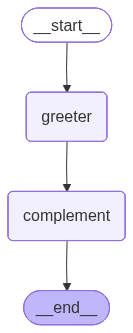

In [14]:
from IPython.display import display , Image
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({'message' : 'Bob'})

In [12]:
print(result)

{'message': 'Hai Bob ,Welcome'}
